## ETAPA 2: TRABAJO EN VARIABLES EXPLICATIVAS

In [1]:
#pip install ipywidgets plotly

In [2]:
# Dependencias básicas
import pandas as pd
import numpy as np

# Dependencias de visualización
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Dependencias de machine learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_excel("../9 - Libertad de expesion y otros/IDEA-GSOD.xlsx")

In [4]:
df

,Economy ISO3,Economy Name,Indicator ID,Indicator,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFG,Afghanistan,IDEA.GSOD.abs_corrupt_est,Absence of Corruption (highest score=1),0.20,0.20,0.16,0.16,0.18,0.21,0.22,0.24,0.24,0.25,0.26,0.25,0.28,0.52,0.46
1,AFG,Afghanistan,IDEA.GSOD.access_just_est,Access to Justice (highest score=1),0.25,0.25,0.25,0.25,0.24,0.23,0.23,0.23,0.23,0.25,0.22,0.24,0.28,0.24,0.18
2,AFG,Afghanistan,IDEA.GSOD.basic_welf_est,Basic Welfare (highest score=1),0.31,0.31,0.34,0.34,0.34,0.34,0.37,0.37,0.36,0.36,0.37,0.39,0.39,0.38,0.38
3,AFG,Afghanistan,IDEA.GSOD.civic_engage_est,Civic Engagement (highest score=1),0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.43
4,AFG,Afghanistan,IDEA.GSOD.civil_lib_est,Civil Liberties (highest score=1),0.54,0.53,0.53,0.53,0.53,0.51,0.50,0.51,0.50,0.50,0.50,0.50,0.52,0.34,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29552,ZWE,Zimbabwe,IDEA.GSOD.v_42_02,Engagement in independent political associatio...,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.73,0.61
29553,ZWE,Zimbabwe,IDEA.GSOD.v_42_03,Engagement in independent trade unions (highes...,0.70,0.70,0.68,0.65,0.61,0.61,0.57,0.57,0.57,0.57,0.57,0.57,0.59,0.64,0.50
29554,ZWE,Zimbabwe,IDEA.GSOD.v_42_04,Civil society traditions (highest score=1),0.56,0.56,0.67,0.67,0.67,0.67,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56
29555,ZWE,Zimbabwe,IDEA.GSOD.v_43_01,Voter turnout (highest score=1),0.46,0.46,0.46,0.46,0.46,0.61,0.61,0.61,0.61,0.61,0.64,0.64,0.64,0.64,0.64


In [5]:
# Eliminamos columna de identificación por código
df = df.drop("Indicator ID", axis = 1)

In [6]:
# Comprobamos columnas
df

,Economy ISO3,Economy Name,Indicator,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFG,Afghanistan,Absence of Corruption (highest score=1),0.20,0.20,0.16,0.16,0.18,0.21,0.22,0.24,0.24,0.25,0.26,0.25,0.28,0.52,0.46
1,AFG,Afghanistan,Access to Justice (highest score=1),0.25,0.25,0.25,0.25,0.24,0.23,0.23,0.23,0.23,0.25,0.22,0.24,0.28,0.24,0.18
2,AFG,Afghanistan,Basic Welfare (highest score=1),0.31,0.31,0.34,0.34,0.34,0.34,0.37,0.37,0.36,0.36,0.37,0.39,0.39,0.38,0.38
3,AFG,Afghanistan,Civic Engagement (highest score=1),0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.43
4,AFG,Afghanistan,Civil Liberties (highest score=1),0.54,0.53,0.53,0.53,0.53,0.51,0.50,0.51,0.50,0.50,0.50,0.50,0.52,0.34,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29552,ZWE,Zimbabwe,Engagement in independent political associatio...,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.73,0.61
29553,ZWE,Zimbabwe,Engagement in independent trade unions (highes...,0.70,0.70,0.68,0.65,0.61,0.61,0.57,0.57,0.57,0.57,0.57,0.57,0.59,0.64,0.50
29554,ZWE,Zimbabwe,Civil society traditions (highest score=1),0.56,0.56,0.67,0.67,0.67,0.67,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56
29555,ZWE,Zimbabwe,Voter turnout (highest score=1),0.46,0.46,0.46,0.46,0.46,0.61,0.61,0.61,0.61,0.61,0.64,0.64,0.64,0.64,0.64


In [7]:
# Eliminamos cadena de texto innecesaria " (highest score=1)"
df['Indicator'] = df['Indicator'].str.split('(').str[0].str.strip()

In [8]:
# Inspeccionamos nombre de variables
df["Indicator"].unique()

array(['Absence of Corruption', 'Access to Justice', 'Basic Welfare',
       'Civic Engagement', 'Civil Liberties', 'Credible Elections',
       'Direct Democracy', 'Effective Parliament',
       'Electoral Participation', 'Elected Government',
       'Freedom of Expression', 'Freedom of Movement',
       'Free Political Parties', 'Freedom of the Press',
       'Freedom of Religion', 'Gender Equality', 'Inclusive Suffrage',
       'Judicial Independence', 'Local Democracy', 'Participation',
       'Personal Integrity and Security', 'Political Equality',
       'Predictable Enforcement', 'Representation', 'Rights',
       'Rule of Law', 'Social Group Equality', 'Direct democracy',
       'EMB autonomy', 'EMB capacity',
       'Election other voting irregularities',
       'Election government intimidation', 'Election free and fair',
       'Competition', 'Global State of Democracy - A3 Electoral process',
       'Global State of Democracy - B2 Political pluralism and participation',
   

In [9]:
# Preparamos dataset para transponerlo (información de origen horizontal)
seleccion = df[
    [
        'Economy ISO3', 'Indicator', '2008', '2009', '2010', '2011', '2012',
        '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
        '2021', '2022'
    ]
]

In [10]:
# Copia de seguridad para nuestro dataframe
df1 = df.copy()

In [11]:
# Creamos dataframe con ayuda de pd.melt
# Omitimos columna de nombre de países
df2 = pd.melt(
    seleccion,
    id_vars=["Economy ISO3", "Indicator"],
    var_name="Year",
    value_name="Value"
)

In [12]:
# Comprobamos dataframe vertical
df2

,Economy ISO3,Indicator,Year,Value
0,AFG,Absence of Corruption,2008,0.20
1,AFG,Access to Justice,2008,0.25
2,AFG,Basic Welfare,2008,0.31
3,AFG,Civic Engagement,2008,0.52
4,AFG,Civil Liberties,2008,0.54
...,...,...,...,...
443350,ZWE,Engagement in independent political associations,2022,0.61
443351,ZWE,Engagement in independent trade unions,2022,0.50
443352,ZWE,Civil society traditions,2022,0.56
443353,ZWE,Voter turnout,2022,0.64


In [13]:
# Cambiamos nombre de columna para mayor facilidad
df2.rename(columns={"Economy ISO3": "Country code"}, inplace = True)

In [14]:
# Cambiamos tipo de datos
df2.Year = df2.Year.astype("int")
df2.Value = df2.Value.astype("float")

In [15]:
df2

,Country code,Indicator,Year,Value
0,AFG,Absence of Corruption,2008,0.20
1,AFG,Access to Justice,2008,0.25
2,AFG,Basic Welfare,2008,0.31
3,AFG,Civic Engagement,2008,0.52
4,AFG,Civil Liberties,2008,0.54
...,...,...,...,...
443350,ZWE,Engagement in independent political associations,2022,0.61
443351,ZWE,Engagement in independent trade unions,2022,0.50
443352,ZWE,Civil society traditions,2022,0.56
443353,ZWE,Voter turnout,2022,0.64


In [16]:
# Ejemplo de slices
# Opposition parties' autonomy
df2.loc[(df2["Indicator"] == "Opposition parties' autonomy") & (df2["Country code"] == "VEN")]

,Country code,Indicator,Year,Value
28224,VEN,Opposition parties' autonomy,2008,0.75
57781,VEN,Opposition parties' autonomy,2009,0.75
87338,VEN,Opposition parties' autonomy,2010,0.75
116895,VEN,Opposition parties' autonomy,2011,0.75
146452,VEN,Opposition parties' autonomy,2012,0.75
176009,VEN,Opposition parties' autonomy,2013,0.75
205566,VEN,Opposition parties' autonomy,2014,0.75
235123,VEN,Opposition parties' autonomy,2015,0.75
264680,VEN,Opposition parties' autonomy,2016,0.75
294237,VEN,Opposition parties' autonomy,2017,0.75


In [17]:
# Civil liberty
df2.loc[(df2["Indicator"] == "Civil Lib") & (df2["Country code"] == "VEN")]

,Country code,Indicator,Year,Value


In [18]:
# Opposition parties' autonomy por año 2022
df2.loc[(df2["Indicator"] == "Opposition parties' autonomy") & (df2["Year"] == 2022)]

,Country code,Indicator,Year,Value
413840,AFG,Opposition parties' autonomy,2022,0.00
414013,AGO,Opposition parties' autonomy,2022,0.75
414188,ALB,Opposition parties' autonomy,2022,0.75
414361,ARE,Opposition parties' autonomy,2022,0.00
414536,ARG,Opposition parties' autonomy,2022,1.00
...,...,...,...,...
442528,XKX,Opposition parties' autonomy,2022,1.00
442696,YEM,Opposition parties' autonomy,2022,0.50
442869,ZAF,Opposition parties' autonomy,2022,0.75
443045,ZMB,Opposition parties' autonomy,2022,0.75


In [19]:
# Países top en inmigración a España en 2022, según archivo trabajo 24287
paises =  [
    'DZA',
 'PER',
 'PRT',
 'PRY',
 'ROU',
 'RUS',
 'NIC',
 'PAK',
 'MAR',
 'GBR',
 'USA',
 'UKR',
 'VEN',
 'SEN',
 'CHN',
 'BGR',
 'COL',
 'CUB',
 'ARG',
 'BRA',
 'HND',
 'DEU',
 'ITA',
 'DOM',
 'ECU',
 'FRA'
]

In [20]:
# Obtenemos los países selectos y asignamos a un nuevo dataframe
df3 = df2.loc[df2["Country code"].isin(paises)]

In [21]:
# dataframe con la información necesaria
df3

,Country code,Indicator,Year,Value
696,ARG,Absence of Corruption,2008,0.51
697,ARG,Access to Justice,2008,0.53
698,ARG,Basic Welfare,2008,0.62
699,ARG,Civic Engagement,2008,0.80
700,ARG,Civil Liberties,2008,0.80
...,...,...,...,...
442151,VEN,Engagement in independent political associations,2022,0.59
442152,VEN,Engagement in independent trade unions,2022,0.49
442153,VEN,Civil society traditions,2022,0.44
442154,VEN,Voter turnout,2022,0.30


Para propósito de nuestro análisis, seleccionaremos indicadores que resultan de vital importancia para la calidad de vida en los países y que además pueden influir en la decisión de abandonar el país de residencia

In [22]:
indicadores = [
    "Absence of Corruption",
    "Public sector corrupt exchanges",
    "Civil Liberties",
    "Civil rights",
    "Judicial accountability",
    "Educational equality",
    "Health equality",
    "Equal opportunity"
]

Usamos la librería de Widgets y Plotly para crear gráficos interactivos, ya que nuestro dataset contiene muchas filas de información que complican la visualización 

In [23]:
# Creación de menú desplegable para uso en gráficos interactivos
country_dropdown = widgets.Dropdown(
    options=df3['Country code'].unique(),
    description='Country:',
    value='ARG'
)

In [24]:
# Definición de fórmula para gráfico de barras interactivo
def update_barplot(country):
    filtered_df = df3[(df3['Country code'] == country) & (df3['Indicator'].isin(indicadores))]
    aggregated_df = filtered_df.groupby('Indicator')['Value'].mean().reset_index()
    fig = px.bar(aggregated_df, x='Indicator', y='Value', title=f'Average Value by Indicator for {country}')
    fig.show()

widgets.interact(update_barplot, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=('ARG', 'BGR', 'BRA', 'CHN', 'COL', 'CUB', 'DEU…

<function __main__.update_barplot(country)>

In [25]:
# Definición de función para crear una boxplot interactiva
def update_boxplot(country):
    filtered_df = df3[(df3['Country code'] == country) & (df3['Indicator'].isin(indicadores))]
    fig = px.box(filtered_df, x='Indicator', y='Value', title=f'Value Distribution for {country}')
    fig.show()

widgets.interact(update_boxplot, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=('ARG', 'BGR', 'BRA', 'CHN', 'COL', 'CUB', 'DEU…

<function __main__.update_boxplot(country)>

Creamos una pivot table para exploración de datos, datos promedio

In [29]:
filtered_df = df3[df3['Indicator'].isin(indicadores) & (df3['Country code'].isin(paises))]

In [30]:
# Cluster de KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
pivot_df = filtered_df.pivot_table(index='Country code', columns='Indicator', values='Value', aggfunc='mean').fillna(0)

In [31]:
# Modelo KMeans
pivot_df_clustering = pivot_df.values
kmeans.fit(pivot_df_clustering)
pivot_df['Cluster'] = kmeans.labels_

C:\Users\erick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\erick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



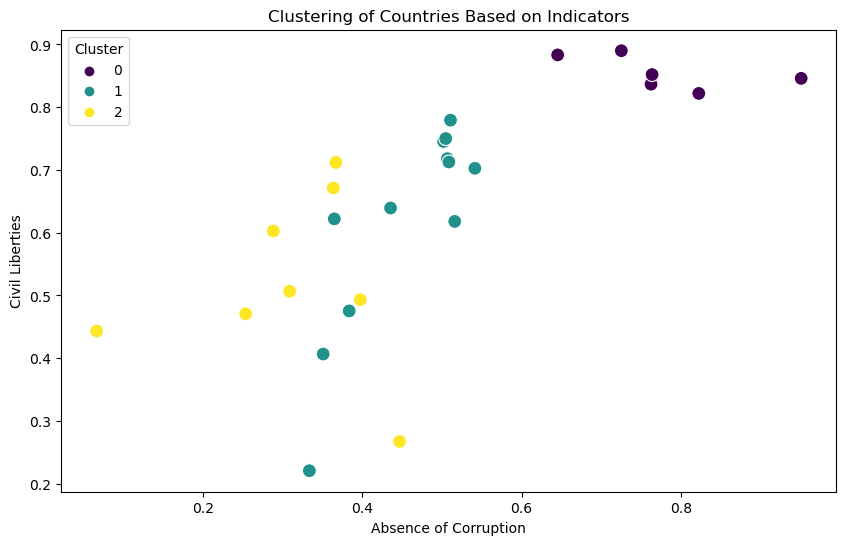

In [32]:
# Gráfico de clúster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pivot_df, x='Absence of Corruption', y='Civil Liberties', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering of Countries Based on Indicators')
plt.xlabel('Absence of Corruption')
plt.ylabel('Civil Liberties')
plt.legend(title='Cluster')
plt.show()

In [34]:
# Imprimimos clústeres para entender qué países se agrupan según indicadores
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")
    countries = pivot_df[pivot_df['Cluster'] == cluster].index.tolist()
    print(", ".join(countries))
    print()

Cluster 0:
DEU, FRA, GBR, ITA, PRT, USA

Cluster 1:
ARG, BGR, BRA, COL, CUB, DZA, ECU, PER, ROU, RUS, SEN, UKR

Cluster 2:
CHN, DOM, HND, MAR, NIC, PAK, PRY, VEN



Vemos que los países se agrupan hasta cierto punto por región, aunque los países como Rusia y Ucrania podemos considerarlos como países adicionales a las tendencias regionales debido al conflicto que inició en 2022.